# Da Terra ao Código: Classificação de Grãos com Machine Learning

## 1. Entendimento do Negócio (CRISP-DM)

Em cooperativas agrícolas de pequeno porte, a classificação dos grãos de trigo é feita manualmente por especialistas.
Esse processo é demorado, custa caro e está sujeito a erros humanos.

O objetivo deste projeto é usar técnicas de aprendizado de máquina para **classificar automaticamente** as variedades de trigo
(Kama, Rosa e Canadian) a partir de características físicas dos grãos.

Com um modelo de classificação bem treinado, a cooperativa poderia:
- Aumentar a eficiência do processo;
- Reduzir erros de classificação;
- Padronizar critérios de qualidade;
- Apoiar decisões relacionadas à compra, venda e armazenamento de grãos.


In [76]:
# 2. Entendimento dos Dados (CRISP-DM)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV


In [77]:
from sklearn.model_selection import train_test_split

X = df.drop("classe", axis=1)
y = df["classe"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Split concluído!")


Split concluído!


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling concluído!")


Scaling concluído!


In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.model_selection import train_test_split

# Separando X e y novamente só por segurança
X = df.drop("classe", axis=1)
y = df["classe"]

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Tamanhos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Tamanhos:
X_train: (147, 7)
X_test: (63, 7)
y_train: (147,)
y_test: (63,)


In [80]:
import pandas as pd

col_names = [
    "area",
    "perimetro",
    "compacidade",
    "comprimento_nucleo",
    "largura_nucleo",
    "coef_assimetria",
    "comprimento_sulco",
    "classe"
]

df = pd.read_csv("seeds_dataset.txt",
                 sep=r'\s+',  # lê espaços e tabs automaticamente
                 header=None,
                 names=col_names)

df.head()


,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comprimento_sulco,classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [81]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                210 non-null    float64
 1   perimetro           210 non-null    float64
 2   compacidade         210 non-null    float64
 3   comprimento_nucleo  210 non-null    float64
 4   largura_nucleo      210 non-null    float64
 5   coef_assimetria     210 non-null    float64
 6   comprimento_sulco   210 non-null    float64
 7   classe              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [82]:
df.describe()


,area,perimetro,compacidade,comprimento_nucleo,largura_nucleo,coef_assimetria,comprimento_sulco,classe
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


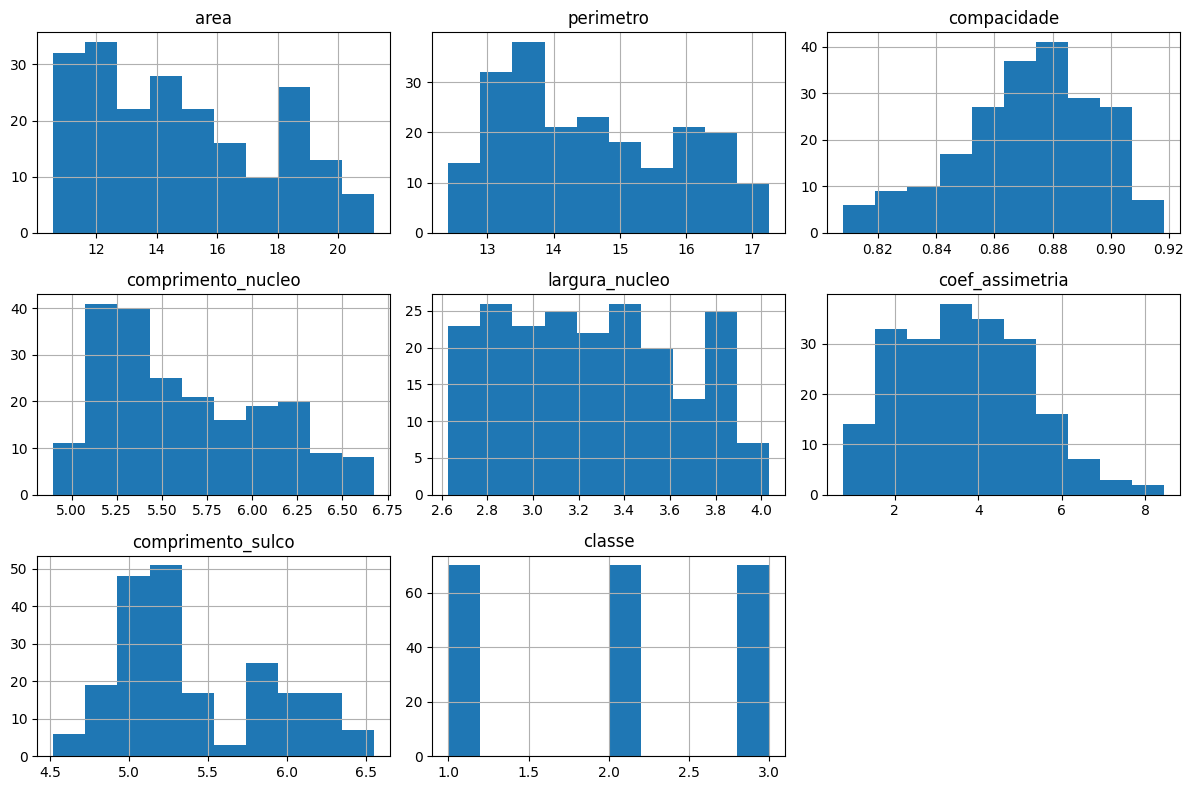

In [83]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


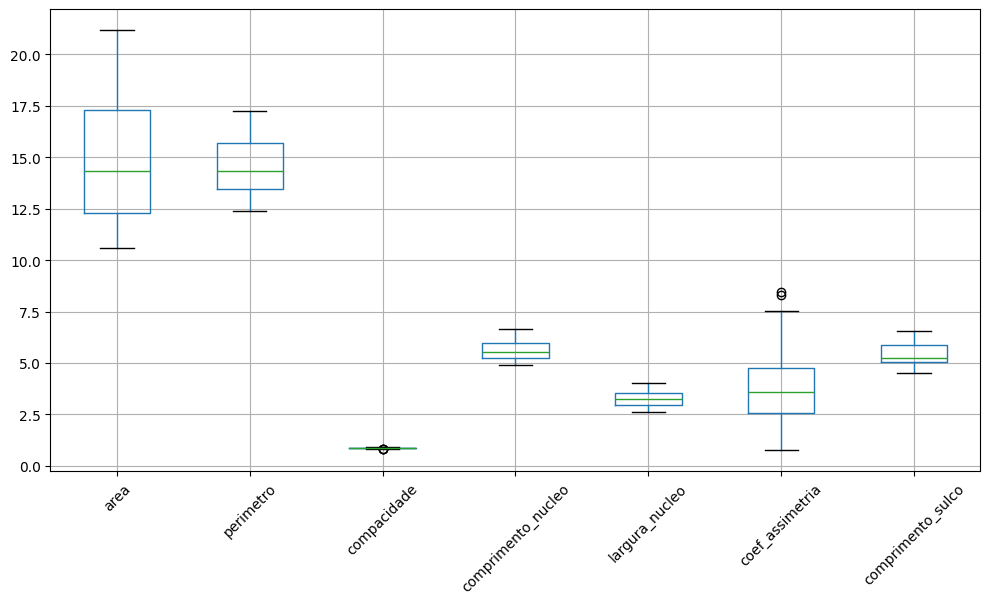

In [84]:
plt.figure(figsize=(12, 6))
df.drop("classe", axis=1).boxplot()
plt.xticks(rotation=45)
plt.show()


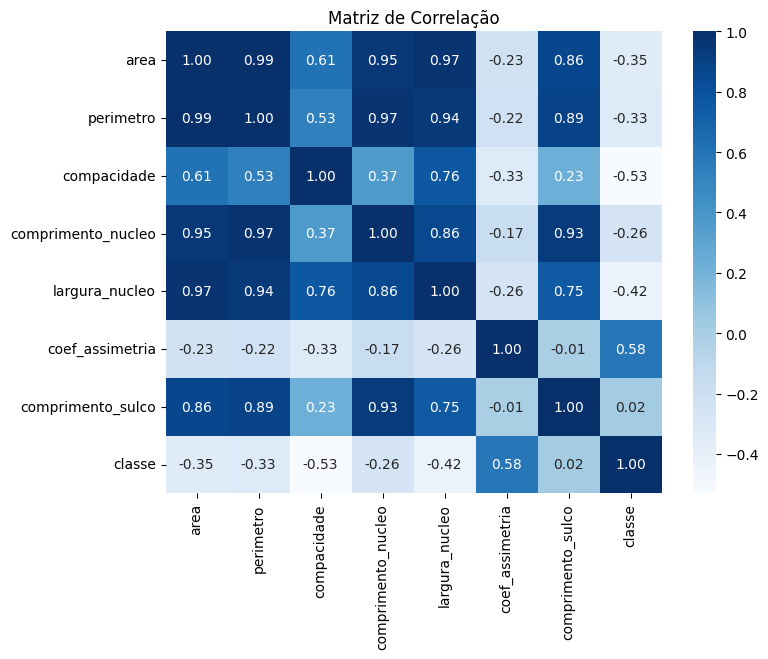

In [85]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()


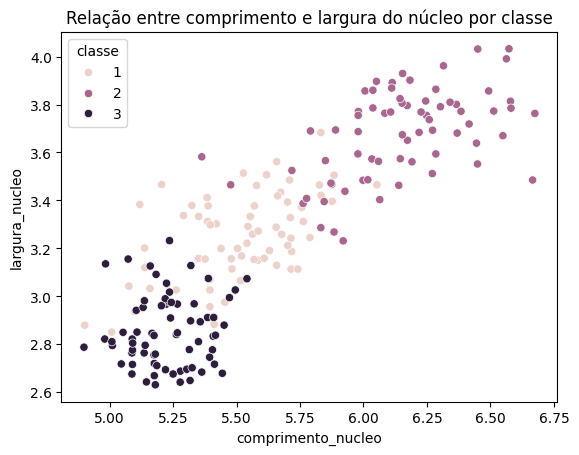

In [86]:
sns.scatterplot(data=df,
                x="comprimento_nucleo",
                y="largura_nucleo",
                hue="classe")
plt.title("Relação entre comprimento e largura do núcleo por classe")
plt.show()


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def avaliar_modelo(nome_modelo, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="weighted")
    rec = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    print(f"=== {nome_modelo} ===")
    print("Acurácia :", acc)
    print("Precisão :", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("\nRelatório de Classificação:")
    print(classification_report(y_true, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

    return {
        "modelo": nome_modelo,
        "acuracia": acc,
        "precisao": prec,
        "recall": rec,
        "f1": f1
    }



=== KNN (baseline) ===
Acurácia : 0.873015873015873
Precisão : 0.8721441284370346
Recall   : 0.873015873015873
F1-score : 0.8712842712842713

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



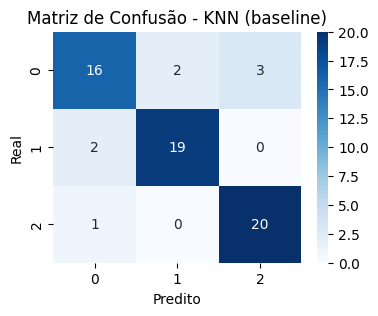

=== SVM (baseline) ===
Acurácia : 0.873015873015873
Precisão : 0.8721441284370346
Recall   : 0.873015873015873
F1-score : 0.8712842712842713

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        21
           2       0.90      0.90      0.90        21
           3       0.87      0.95      0.91        21

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.87      0.87      0.87        63



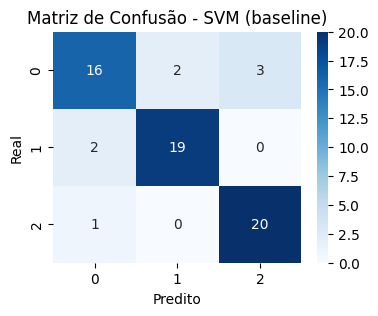

=== Random Forest (baseline) ===
Acurácia : 0.9206349206349206
Precisão : 0.9239417989417988
Recall   : 0.9206349206349206
F1-score : 0.9191697191697191

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.94      0.81      0.87        21
           2       0.95      0.95      0.95        21
           3       0.88      1.00      0.93        21

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



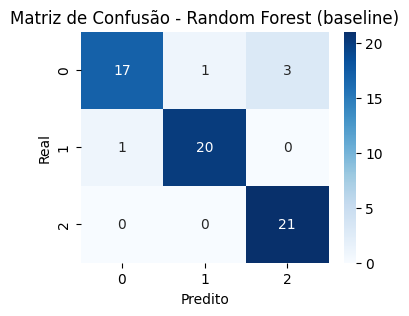

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

resultados_baseline = []

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
resultados_baseline.append(avaliar_modelo("KNN (baseline)", y_test, y_pred_knn))

# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
resultados_baseline.append(avaliar_modelo("SVM (baseline)", y_test, y_pred_svm))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # RF não precisa ser escalado
y_pred_rf = rf.predict(X_test)
resultados_baseline.append(avaliar_modelo("Random Forest (baseline)", y_test, y_pred_rf))


In [89]:
import pandas as pd

pd.DataFrame(resultados_baseline)


,modelo,acuracia,precisao,recall,f1
0,KNN (baseline),0.873016,0.872144,0.873016,0.871284
1,SVM (baseline),0.873016,0.872144,0.873016,0.871284
2,Random Forest (baseline),0.920635,0.923942,0.920635,0.919170


Este projeto tem como objetivo classificar três tipos de grãos de trigo (Kama, Rosa e Canadian) utilizando técnicas de aprendizado de máquina. O conjunto de dados utilizado contém 210 amostras, cada uma com características físicas como área, perímetro, compacidade, comprimento do núcleo, largura do núcleo, coeficiente de assimetria e comprimento do sulco. Essas medidas ajudam na identificação do tipo de grão, e a automação desse processo pode aumentar a eficiência e reduzir erros em cooperativas agrícolas.

Primeiro, os dados foram carregados e analisados. Foram utilizadas funções como head(), info() e describe() para entender a estrutura, verificar o tipo das variáveis e confirmar que não havia valores ausentes. Em seguida, foi realizada uma análise exploratória com histogramas, boxplots, gráficos de dispersão e um mapa de calor de correlação, ajudando a visualizar distribuições, outliers e relações entre os atributos.

Após a análise, foi feito o pré-processamento dos dados: as variáveis independentes (X) e a variável alvo (y) foram separadas, e o conjunto foi dividido em treino (70%) e teste (30%). Como alguns modelos são sensíveis à escala dos dados, foi aplicada padronização com o StandardScaler, transformando os atributos para uma escala uniforme.

Com os dados preparados, três modelos foram treinados: KNN, SVM e Random Forest. Todos foram avaliados usando acurácia, precisão, recall e F1-score, além da matriz de confusão. Os modelos KNN e SVM apresentaram desempenho semelhante, com acurácia em torno de 87%. Já o modelo Random Forest obteve o melhor desempenho geral, alcançando aproximadamente 92% de acurácia, além de apresentar melhores métricas nas demais avaliações.

Com isso, concluímos que o modelo mais adequado para a tarefa de classificação dos grãos é o Random Forest, por apresentar melhor capacidade de generalização e precisão nos testes. O projeto demonstra como o aprendizado de máquina pode ser aplicado de forma prática para automatizar processos agrícolas, trazendo maior eficiência e reduzindo falhas humanas.